In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay


In [24]:
# Set seed for reproducibility
np.random.seed(0)

# Generate data
F = 2  # number of features
K = 2  # number of classes
Nclass1 = 500
Nclass2 = 300

X_a = np.random.randn(Nclass1, F) + np.array([0, 0])
X_b = np.random.randn(Nclass2, F) + np.array([1.3, 1.3])
X = np.vstack([X_a, X_b])
t = np.array([0]*Nclass1 + [1]*Nclass2)

# Split data
ftest = 0.4
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=ftest, stratify=t, random_state=0)


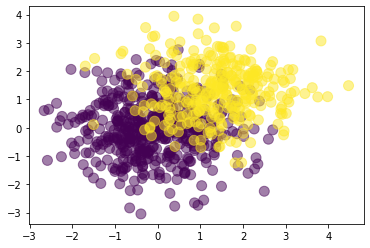

In [25]:
plt.scatter(X[:,0],X[:,1],c=t,s=100,alpha=0.5)
plt.show()

In [34]:
# Choose model, fit and predict
model = LinearDiscriminantAnalysis()
model.fit(X_train, t_train)
t_pred = model.predict(X_test) # assumes tcut=0.5
# compute the probabilities
p_C1 = model.predict_proba(X_test)[:, 1]  # shape: (n_samples,)

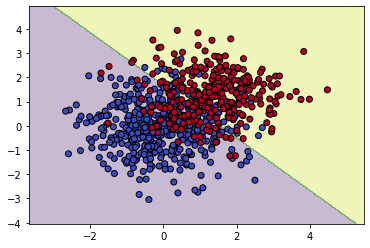

In [68]:
#plot decision boundary
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=t, edgecolor='k', cmap=plt.cm.coolwarm)

In [69]:
# metrics
tcut = 0.56
# Convert probabilities to hard labels
t_pred = (p_C1 >= tcut).astype(int)
# Compute accuracy
acc = accuracy_score(t_test, t_pred)
print('Accuracy: ',acc)
# Compute confusion matrix
cm = confusion_matrix(t_test, t_pred).T # transpose because my definition is transposed wrt sklearn
print('Confusion Matrix:\n',cm)

Accuracy:  0.828125
Confusion Matrix:
 [[177  32]
 [ 23  88]]


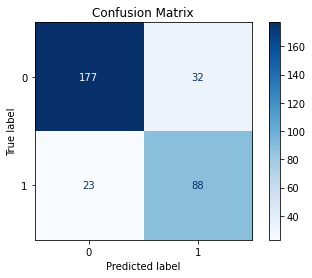

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)  # You can choose another colormap if you want

plt.title("Confusion Matrix")
plt.show()

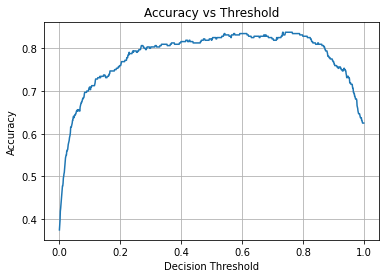

In [67]:
#plot accuracy as a function of the threshold
thresholds = np.linspace(0, 1, 1000)
accuracies = []

for tcut in thresholds:
    t_pred = (p_C1 >= tcut).astype(int)
    acc = accuracy_score(t_test, t_pred)
    accuracies.append(acc)

# Plot accuracy vs threshold
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel("Decision Threshold")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Threshold")
plt.grid(True)



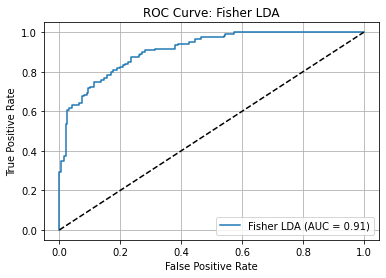

In [64]:
probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(t_test, probs)
roc_auc = auc(fpr, tpr)
    
plt.figure()
plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve: {name}')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [73]:
# Perform 5-fold cross-validation and get accuracy scores
scores = cross_val_score(model, X, t, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Cross-validation accuracy scores: [0.81875 0.86875 0.8125  0.84375 0.84375]
Mean accuracy: 0.8375
Standard deviation: 0.020155644370746382
